### Question 2 
a. Explain how you can implement ML in a real world application.

**Answer**

Here is a general breakdown of the procedure needed to create machine-learning applications.

- Libraries and datasets 
- Preprocess data
- Remove extra spaces
- Vectorize the text data using TF-IDF
- Encode the target variable
- Train a ML Model
- Install flask and quick set up
- Define the flask app
- Make an HTML file
- Add navigation bar
- POST request using form element through UI
- See the result

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statistics

In [117]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [118]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [119]:
df.shape

(13320, 9)

In [120]:
df = df.drop("society",axis=1)

In [121]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [122]:
df.duplicated().sum()

568

In [123]:
df = df.drop_duplicates()

In [124]:
df.shape

(12752, 8)

In [125]:
df.isna().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         605
price             0
dtype: int64

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12752 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12752 non-null  object 
 1   availability  12752 non-null  object 
 2   location      12751 non-null  object 
 3   size          12736 non-null  object 
 4   total_sqft    12752 non-null  object 
 5   bath          12679 non-null  float64
 6   balcony       12147 non-null  float64
 7   price         12752 non-null  float64
dtypes: float64(3), object(5)
memory usage: 896.6+ KB


In [127]:
df.nunique()

area_type          4
availability      81
location        1305
size              31
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [128]:
mode_balcony = statistics.mode(df["balcony"])
median_bath = df["bath"].median()
mode_size = statistics.mode(df["size"])
mode_location = statistics.mode(df["location"])

In [129]:
df["bath"] = df[["bath"]].fillna(median_bath)

In [130]:
df["balcony"] = df[["balcony"]].fillna(mode_balcony)

In [131]:
df["size"] = df[["size"]].fillna(mode_size )

In [132]:
df["location"] = df[["location"]].fillna(mode_location)

In [133]:
df.isna().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [134]:
df.nunique()

area_type          4
availability      81
location        1305
size              31
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [135]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


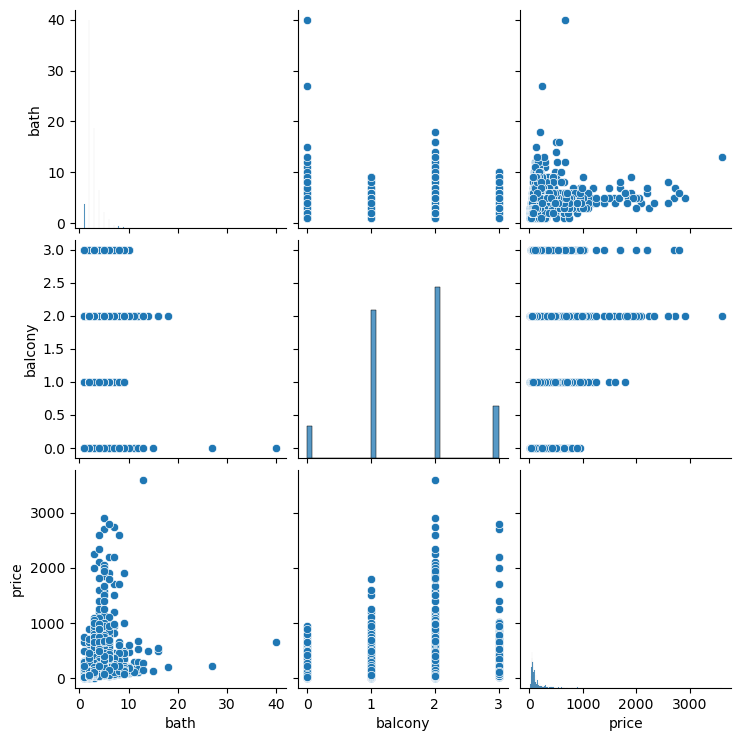

In [136]:
sns.pairplot(df)
plt.show()

ValueError: could not convert string to float: '2100 - 2850'

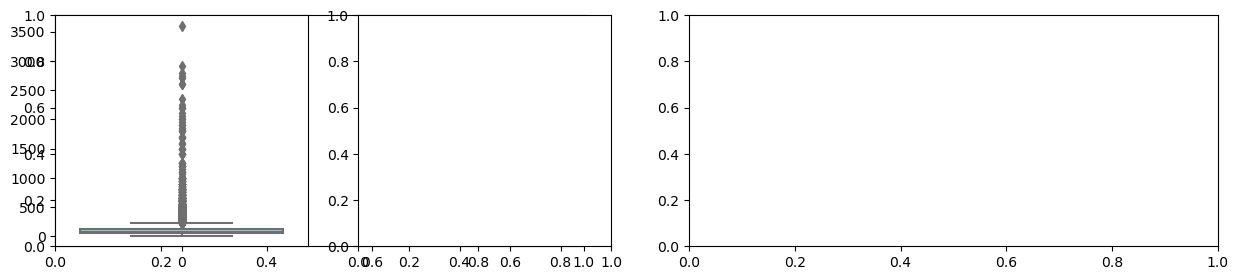

In [112]:
plt.subplots(1,2,figsize=(15,3))
plt.subplot(141)
sns.boxplot(df['price'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['total_sqft'],color='hotpink')
plt.show()

In [137]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR


In [138]:
X = df.drop("price",axis=1)

In [139]:
X.head()

,area_type,availability,location,size,total_sqft,bath,balcony
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0


In [140]:
y = df[["price"]]

In [141]:
y.head()

,price
0,39.07
1,120.00
2,62.00
3,95.00
4,51.00


In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25, random_state=256)

In [ ]:
model = SVR()

model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
r2_score(y_test, y_predict)
mean_absolute_error(y_test, y_pred)